# CYO-Project
## Inventory Management

In [185]:
#Importing all needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import pickle
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


#CSV DATA FILE
filename = '../data/Cleaned_ML_Dataset.csv'
df = pd.read_csv(filename)

In [186]:
#Testing Data for Printing
print(df.head())

      RegionName               CountryName  State       City    WarehouseName  \
0  South America  United States of America  Texas  Southlake  Southlake Texas   
1  South America  United States of America  Texas  Southlake  Southlake Texas   
2  South America  United States of America  Texas  Southlake  Southlake Texas   
3  South America  United States of America  Texas  Southlake  Southlake Texas   
4  South America  United States of America  Texas  Southlake  Southlake Texas   

  CategoryName                       ProductName  ProductStandardCost  Profit  \
0          CPU  Intel Xeon E5-2699 V3 (OEM/Tray)              2867.51  542.95   
1          CPU             Intel Xeon E5-2697 V3              2326.27  448.71   
2          CPU  Intel Xeon E5-2698 V3 (OEM/Tray)              2035.18  625.54   
3          CPU             Intel Xeon E5-2697 V4              2144.40  410.59   
4          CPU  Intel Xeon E5-2685 V3 (OEM/Tray)              2012.11  489.58   

   ProductListPrice  Custo

In [187]:
#Checking for null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionName           400 non-null    object 
 1   CountryName          400 non-null    object 
 2   State                400 non-null    object 
 3   City                 400 non-null    object 
 4   WarehouseName        400 non-null    object 
 5   CategoryName         400 non-null    object 
 6   ProductName          400 non-null    object 
 7   ProductStandardCost  400 non-null    float64
 8   Profit               400 non-null    float64
 9   ProductListPrice     400 non-null    float64
 10  CustomerCreditLimit  400 non-null    int64  
 11  Status               400 non-null    object 
 12  OrderDate            400 non-null    object 
 13  OrderItemQuantity    400 non-null    int64  
 14  PerUnitPrice         400 non-null    float64
 15  TotalItemQuantity    400 non-null    int

In [188]:
#Code to print all columns and describe them regardless of datatype
print(df.describe(include='all'))

            RegionName               CountryName       State             City  \
count              400                       400         400              400   
unique               5                         6           9                9   
top     North  America  United States of America  New Jersey  South Brunswick   
freq               177                       178          45               45   
mean               NaN                       NaN         NaN              NaN   
std                NaN                       NaN         NaN              NaN   
min                NaN                       NaN         NaN              NaN   
25%                NaN                       NaN         NaN              NaN   
50%                NaN                       NaN         NaN              NaN   
75%                NaN                       NaN         NaN              NaN   
max                NaN                       NaN         NaN              NaN   

       WarehouseName Catego

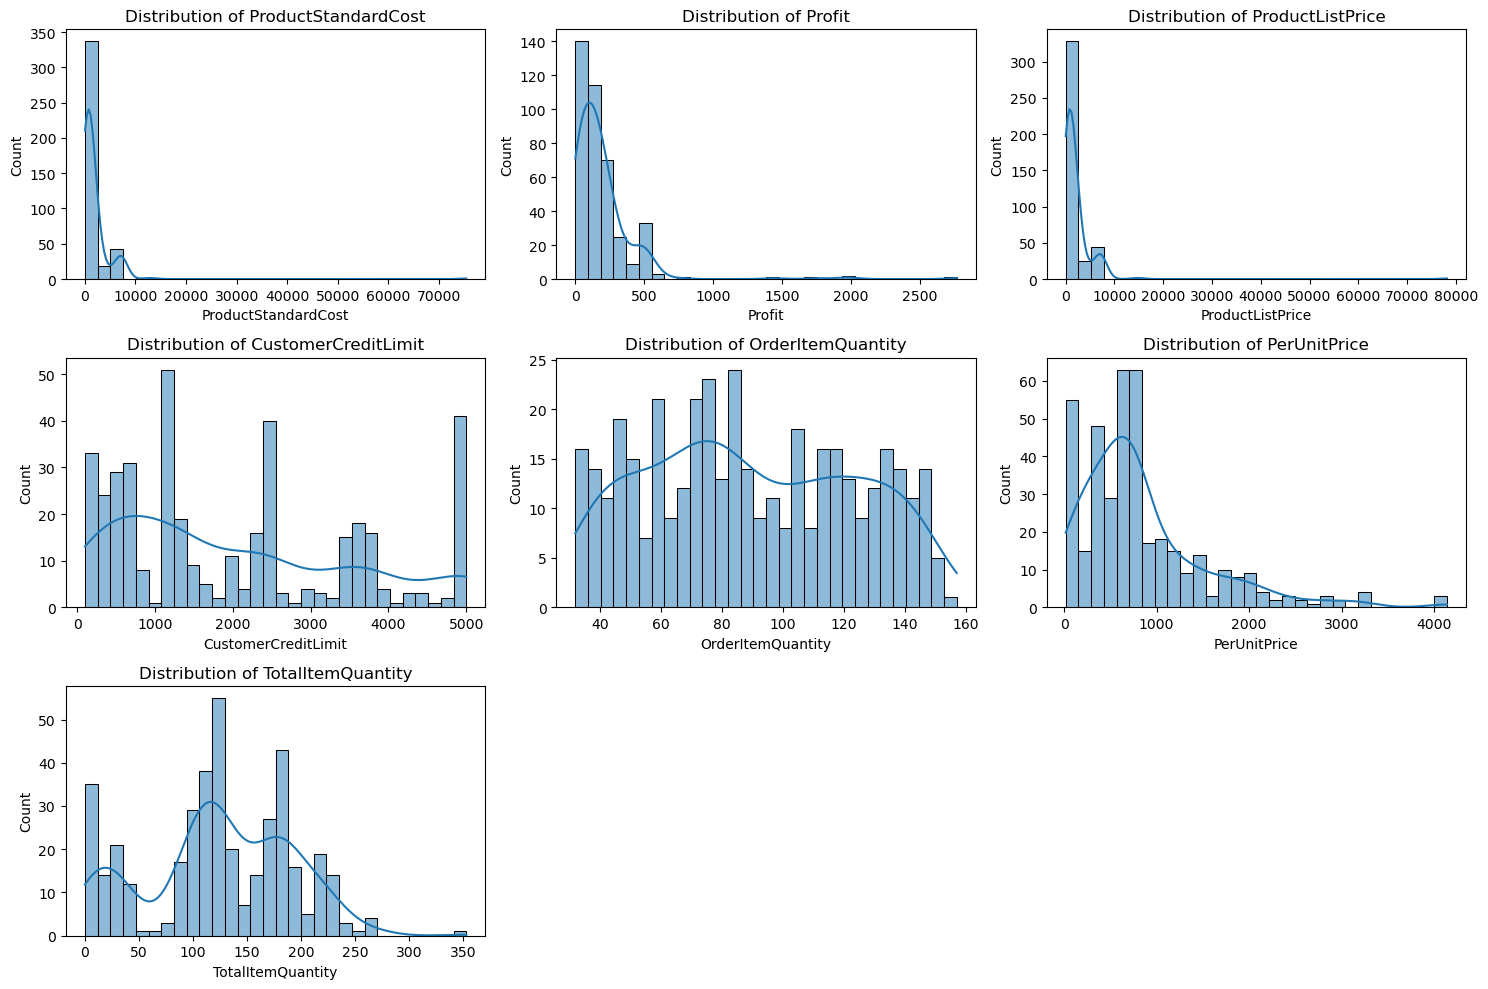

In [189]:
#This line stores only columns with float64, int64 into numerical_columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15,10))

#This block loops through each column in numerical_columns and plots columns on a sns histogram
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

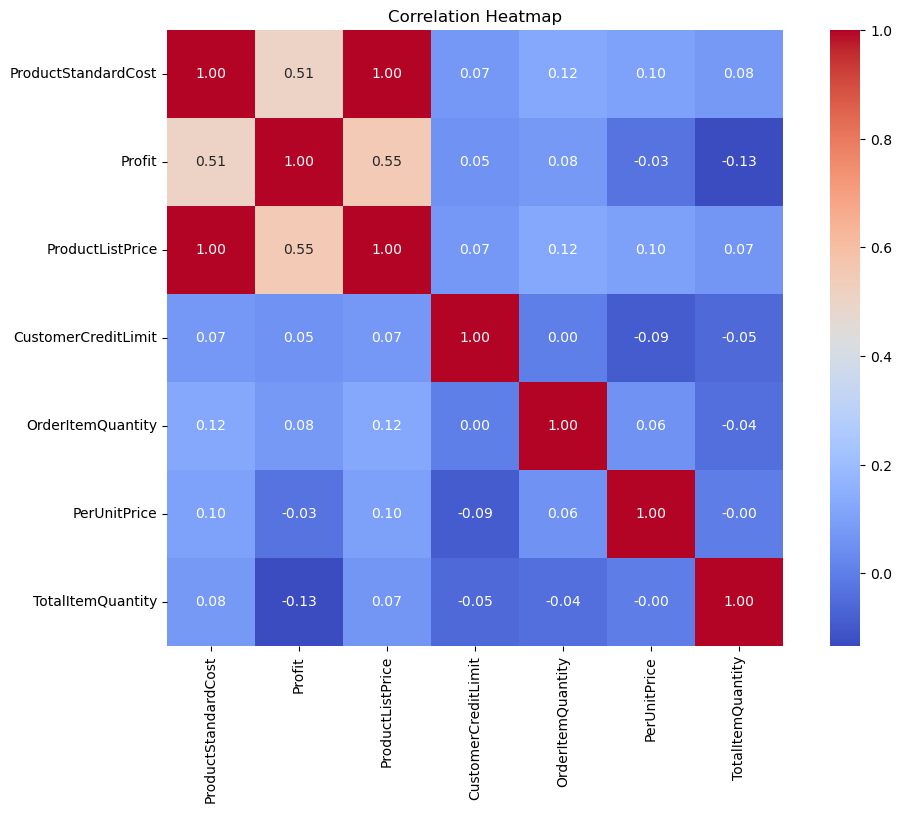

In [190]:
#Generates a correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [191]:
#Created an empty dictionary to store LabelEncoder Objects for each column
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


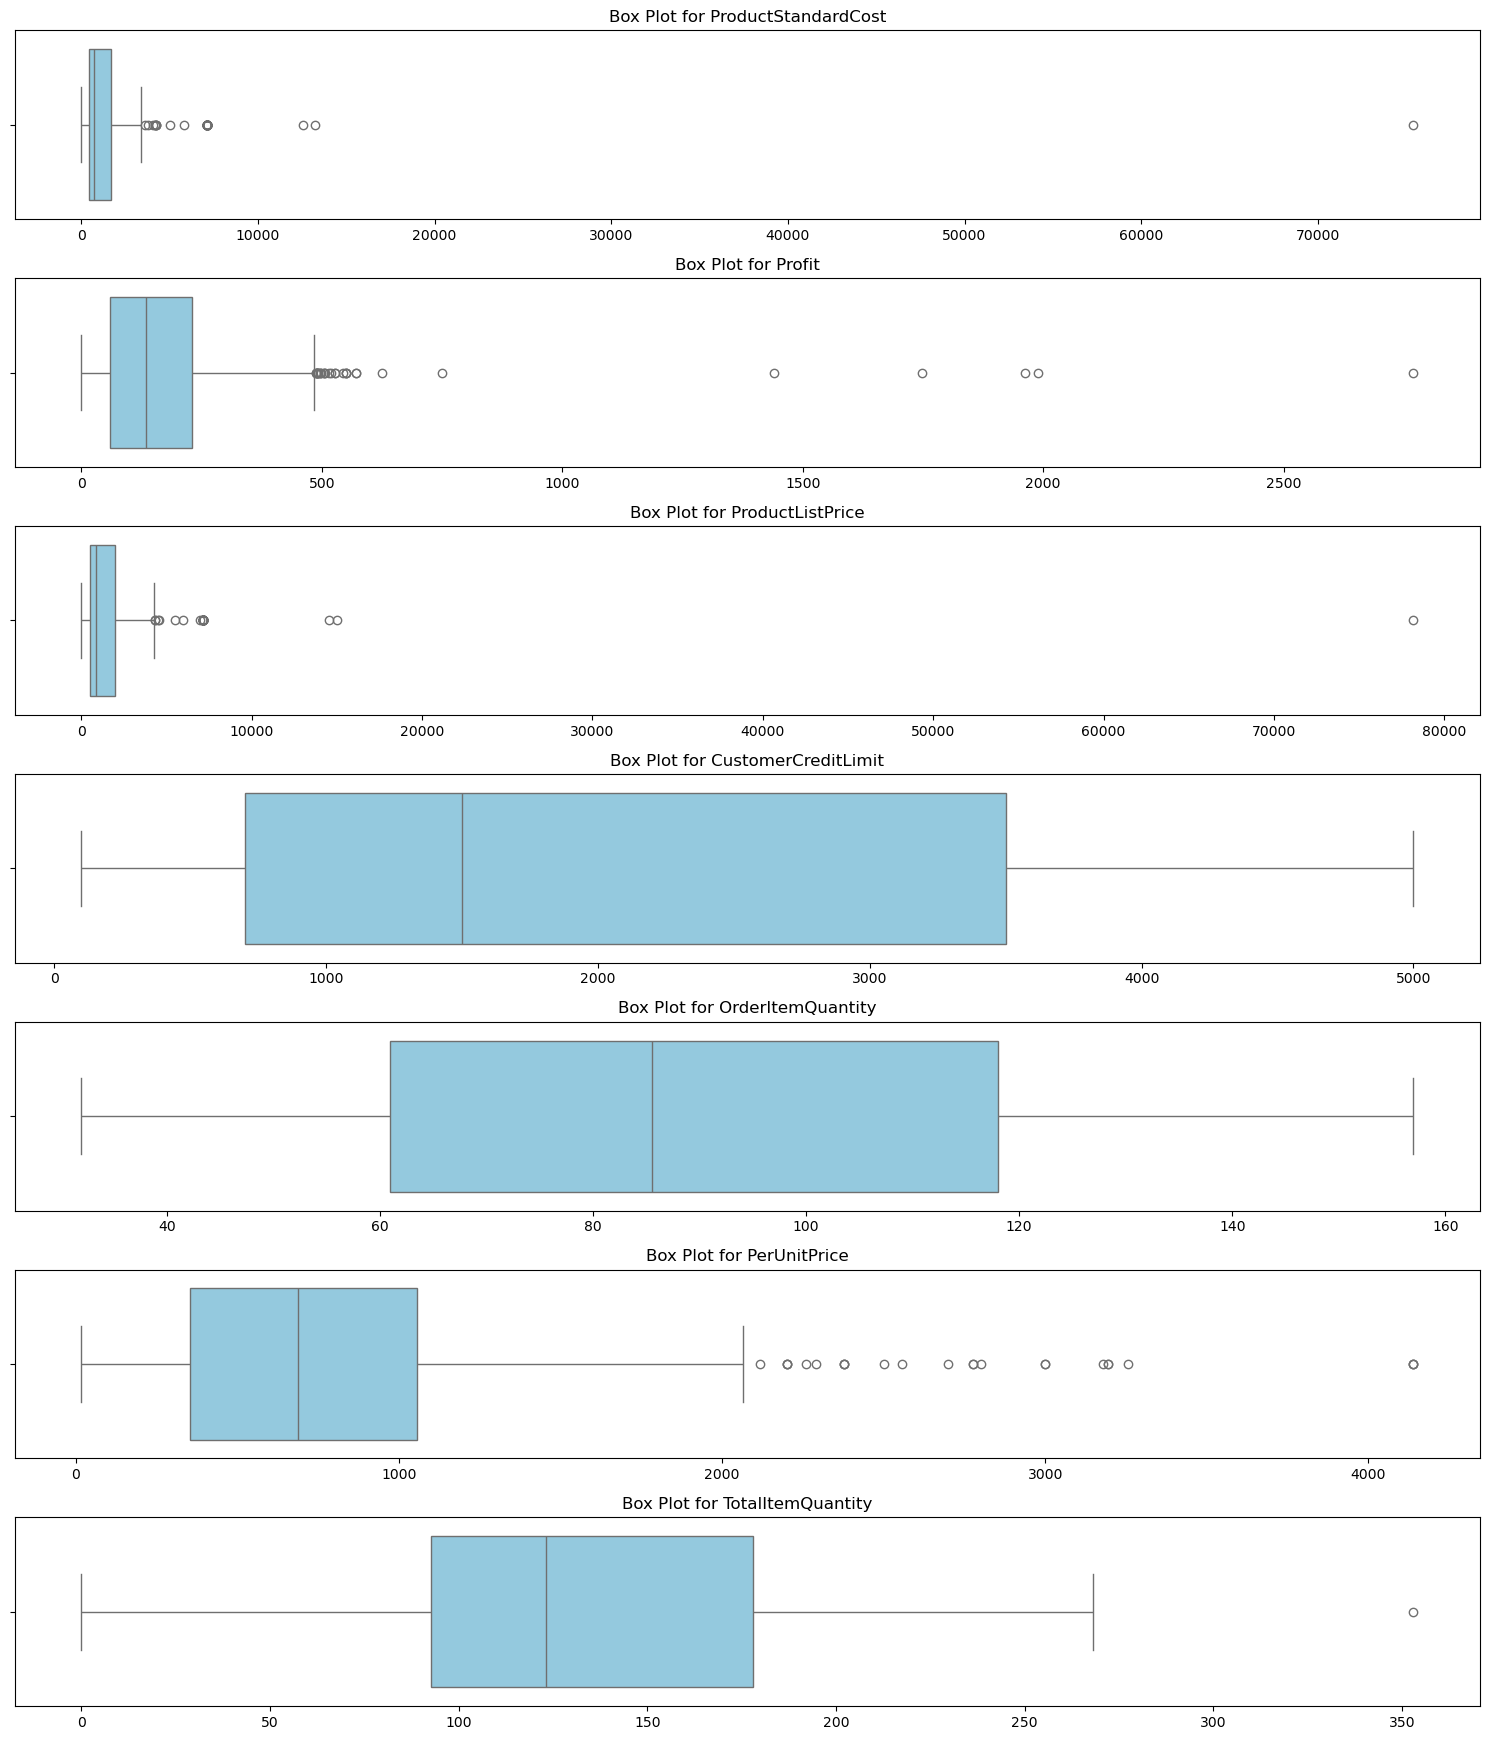

In [192]:

#Setup of plot
plt.figure(figsize=(15, len(numerical_columns) * 2.5))  

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [193]:

# Function to remove outliers from a given column based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Loop to remove outliers iteratively
iterations = 0
while True:
    # Keep track of how many rows were removed in this iteration
    prev_shape = df.shape
    
    # Remove outliers for each numerical column
    for col in numerical_columns:
        df = remove_outliers(df, col)
    
    # Check if the shape of the dataset has changed
    if df.shape == prev_shape:

        # No more outliers, exit the loop
        break  
    else:
        
        # If the shape has changed, continue to the next iteration
        iterations += 1  


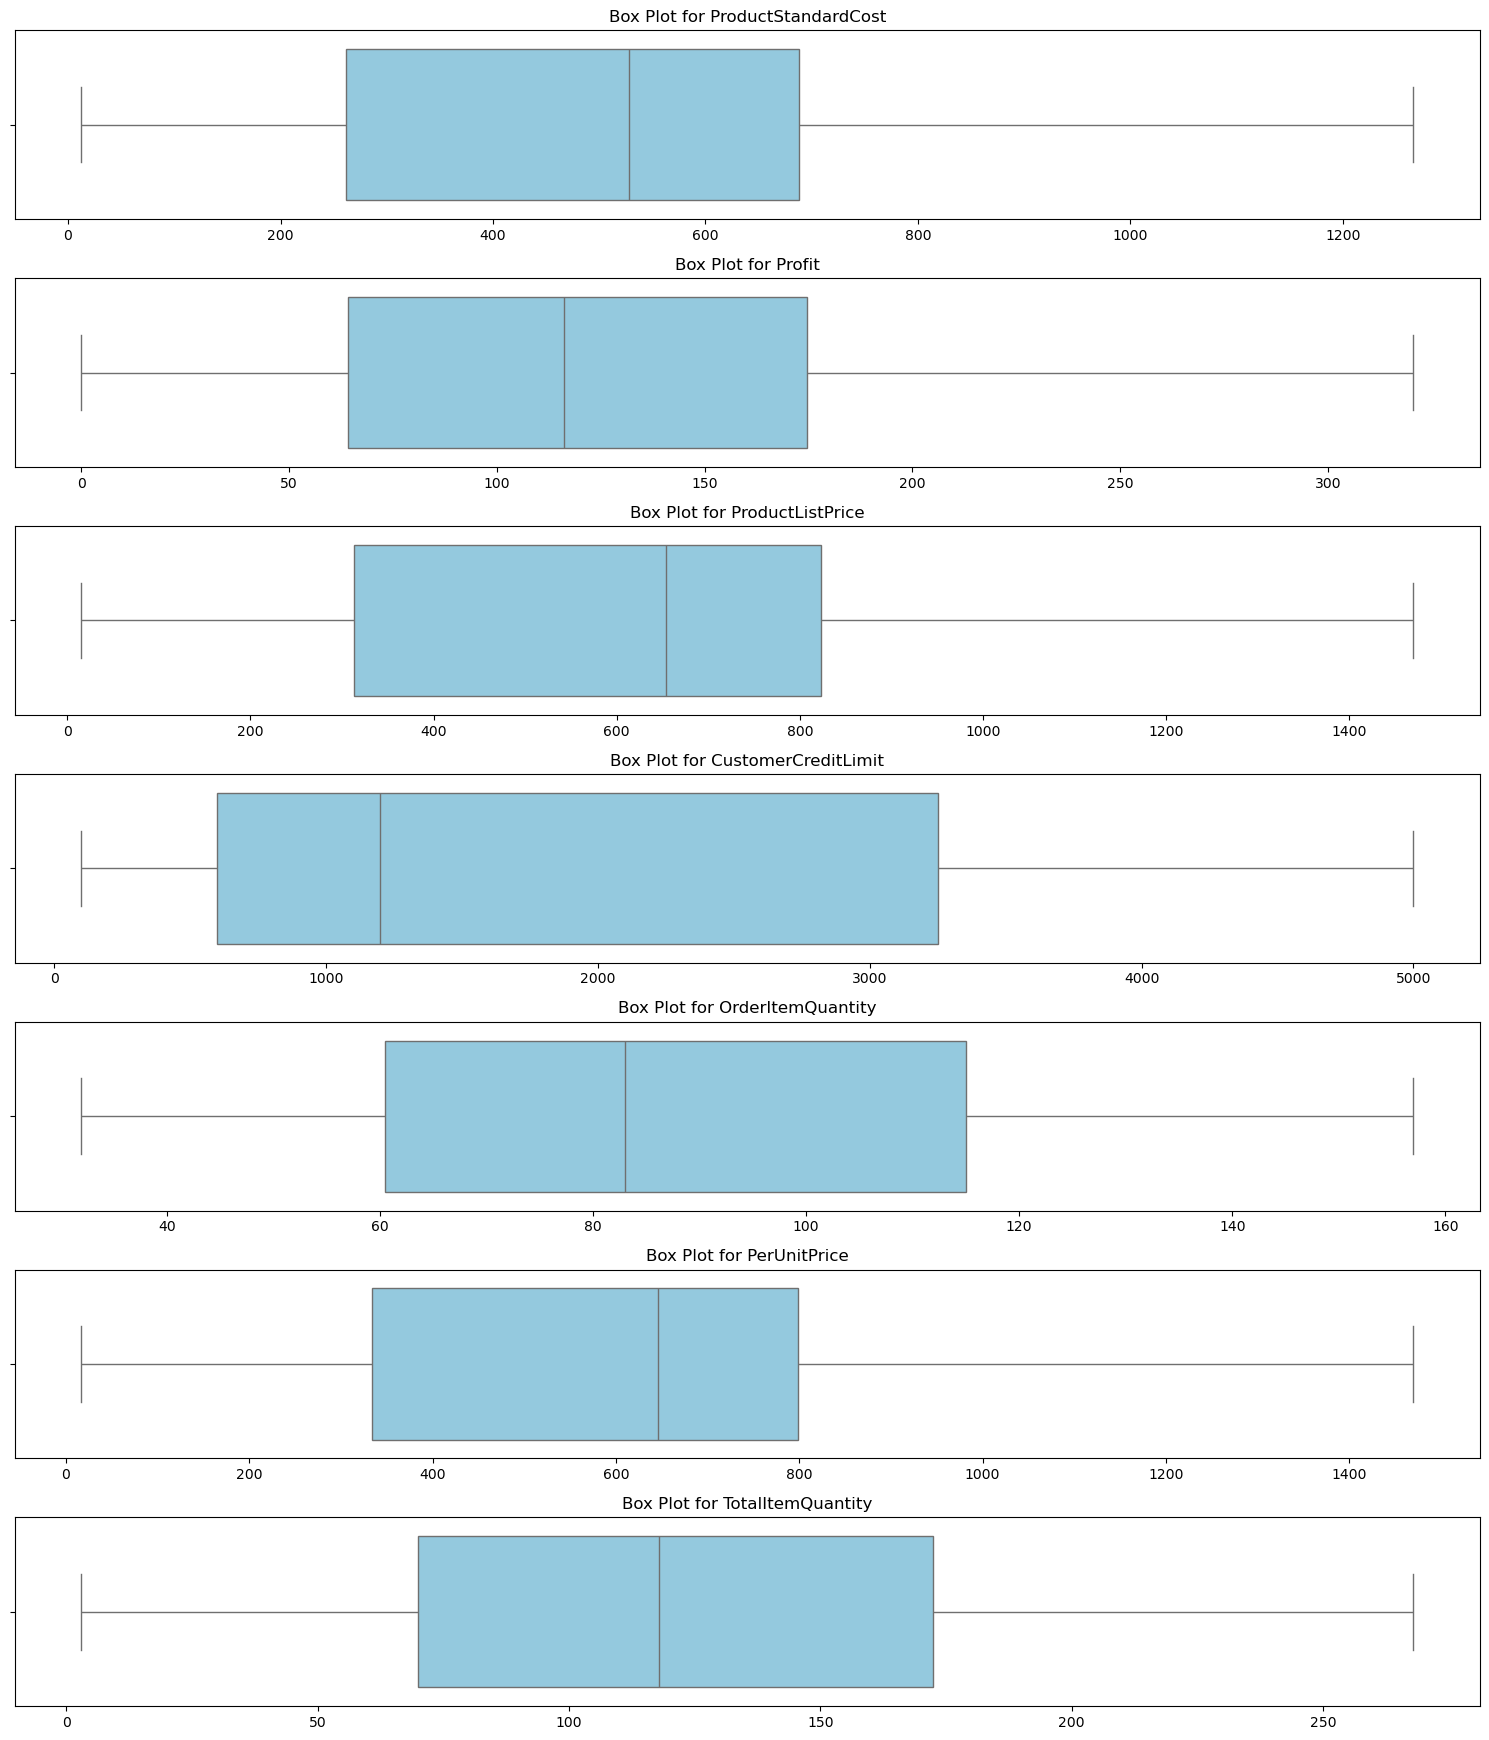

In [194]:

# Set up the plot
plt.figure(figsize=(15, len(numerical_columns) * 2.5))  

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [208]:
#Creates and instance of the StandardScaler class
scaler = StandardScaler()
# This will rescale the values to have a mean of 0 and a standard deviation of 1
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


with open('../artifacts/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



with open('../artifacts/numerical_columns.pkl', 'wb') as f:
    pickle.dump(numerical_columns.tolist(), f)

In [207]:
#Removes Profit column from DataFrame assigned to variable X
X = df.drop('Profit', axis=1)
#Assigns Profit column to variable Y
Y = df['Profit']


with open('../artifacts/features.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)


#X,Y are feature sets
#test_size=0.2 means 20% of data will be used for testing and 80% used for training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)



(175, 15) (44, 15) (175,) (44,)


In [197]:
!pip install xgboost

Model: RandomForestRegressor
R2 Score: 0.7681
Mean Absolute Error: 0.34
Mean Squared Error: 0.20
--------------------------------------------------
✅ Saved model to: ../artifacts/RandomForestRegressor_model.pkl


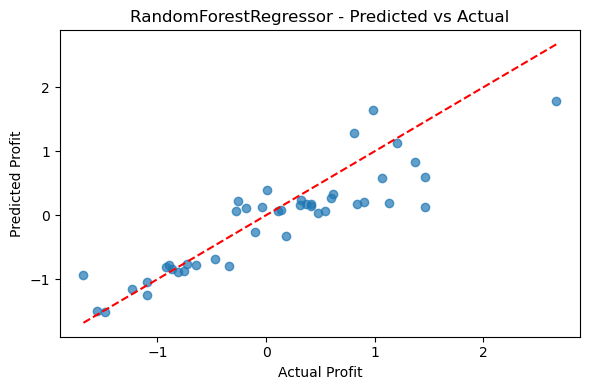

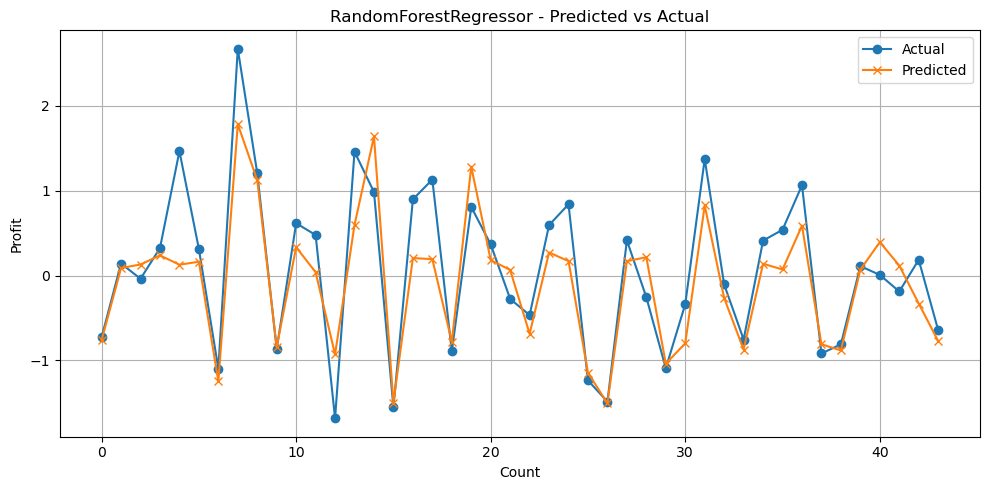

Model: GradientBoostingRegressor
R2 Score: 0.7324
Mean Absolute Error: 0.35
Mean Squared Error: 0.23
--------------------------------------------------
✅ Saved model to: ../artifacts/GradientBoostingRegressor_model.pkl


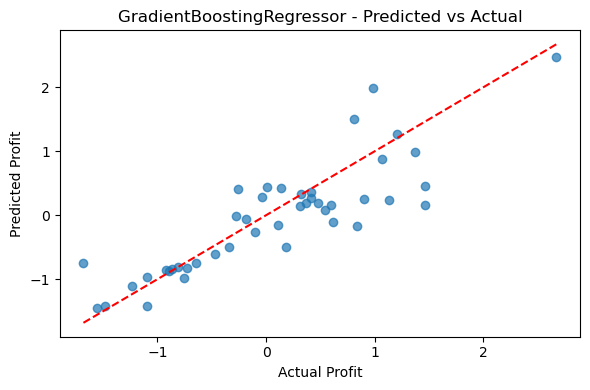

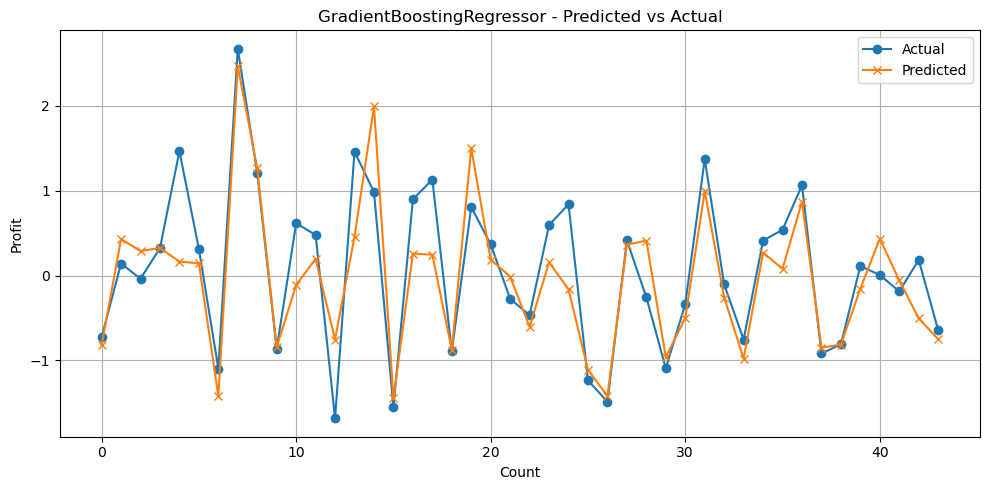

Model: AdaBoostRegressor
R2 Score: 0.7273
Mean Absolute Error: 0.39
Mean Squared Error: 0.24
--------------------------------------------------
✅ Saved model to: ../artifacts/AdaBoostRegressor_model.pkl


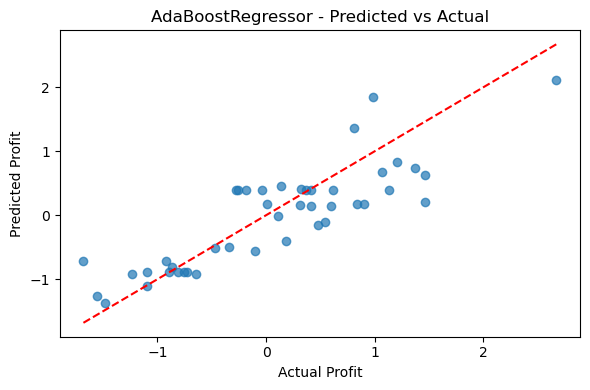

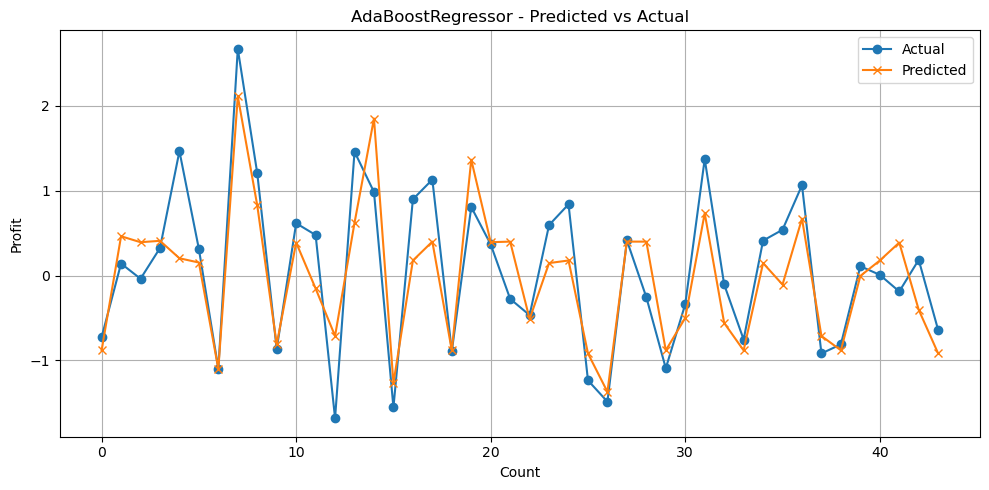

Model: XGBRegressor
R2 Score: 0.7682
Mean Absolute Error: 0.31
Mean Squared Error: 0.20
--------------------------------------------------
✅ Saved model to: ../artifacts/XGBRegressor_model.pkl


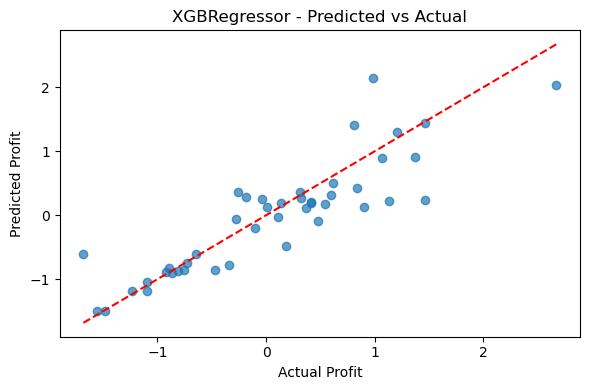

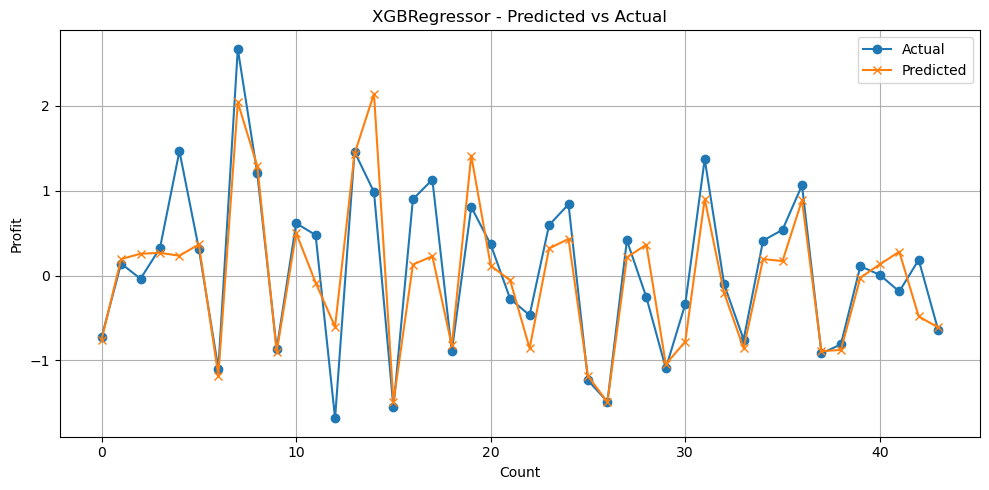

In [198]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Use passthrough for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('category', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # <-- Keeps numeric columns unchanged
)

#Models used to train data
models = [
    RandomForestRegressor(n_estimators=100, random_state=42), 
    GradientBoostingRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
]

#Creates a pipeline for each model that consists of preprocessor and model
for model in models:
    pipeline = make_pipeline(
        preprocessor,
        model
    )

    #Fits pipeline to training data
    pipeline.fit(X_train, Y_train)

    #Predicts data using trained pipeline
    Y_pred = pipeline.predict(X_test)

    # Print metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"R2 Score: {r2_score(Y_test, Y_pred):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.2f}")
    print("-" * 50)


     # Save the trained model pipeline as a pickle file
    model_name = model.__class__.__name__
    filename = f"../artifacts/{model_name}_model.pkl"
    with open(filename, "wb") as f:
        pickle.dump(pipeline, f)
    print(f"✅ Saved model to: {filename}")

    #Generates a scatterplot graph with a regression line
    plt.figure(figsize=(6,4))
    plt.scatter(Y_test, Y_pred, alpha=0.7)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
    plt.xlabel("Actual Profit")
    plt.ylabel("Predicted Profit")
    plt.title(f"{model.__class__.__name__} - Predicted vs Actual")
    plt.tight_layout()
    plt.show()

    # Generates a prediction graph (line graph)
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(Y_test)), Y_test, label="Actual", marker='o')
    plt.plot(range(len(Y_pred)), Y_pred, label="Predicted", marker='x')
    plt.title(f"{model.__class__.__name__} - Predicted vs Actual")
    plt.xlabel("Count")
    plt.ylabel("Profit")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [199]:
#Generates a predictions dataset to artifacts Folder
df.to_csv('../artifacts/predictions.csv', index=False)

In [200]:
#Generates training and test data to data folder

X_train, Y_train.to_csv('../data/train.csv', index=False)
X_test, Y_test.to_csv('../data/test.csv', index=False)


(     RegionName  CountryName  State  City  WarehouseName  CategoryName  \
 231           1            0      5     7              7             1   
 158           2            5      8     3              5             3   
 397           0            3      3     1              1             4   
 398           0            3      3     1              1             4   
 47            2            5      1     5              4             0   
 172           2            5      8     3              5             3   
 273           3            4      2     2              2             3   
 389           0            3      3     1              1             4   
 136           2            5      8     3              5             3   
 217           2            1      6     8              8             1   
 163           2            5      8     3              5             3   
 62            2            5      1     5              4             0   
 313           0         


🔁 Attempt 1...


c:\Users\chesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test R²: 0.7160
Test MSE: 0.2489

🔁 Attempt 2...


c:\Users\chesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test R²: 0.7359
Test MSE: 0.2314

🔁 Attempt 3...


c:\Users\chesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test R²: 0.7093
Test MSE: 0.2547

🔁 Attempt 4...


c:\Users\chesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Test R²: 0.6999
Test MSE: 0.2630

🔁 Attempt 5...


c:\Users\chesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test R²: 0.6945
Test MSE: 0.2677

 Loop ended after 5 attempts. Best R² Score: 0.7359


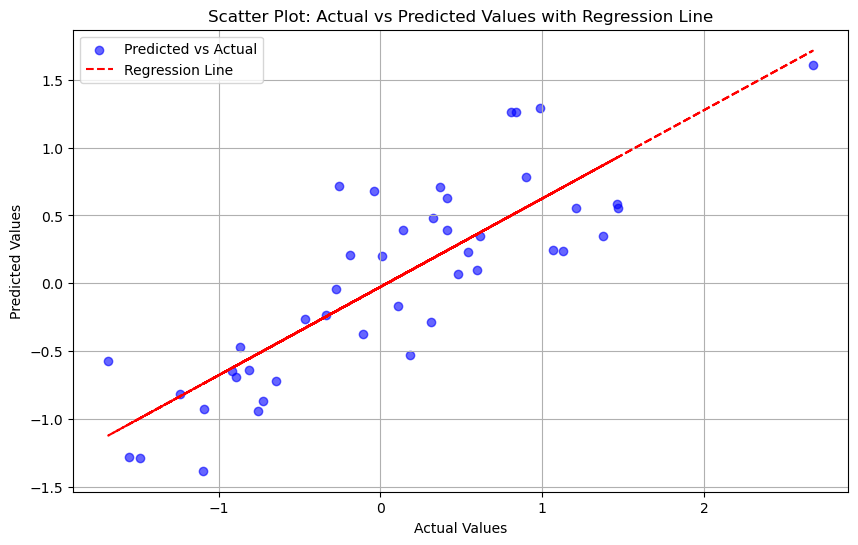

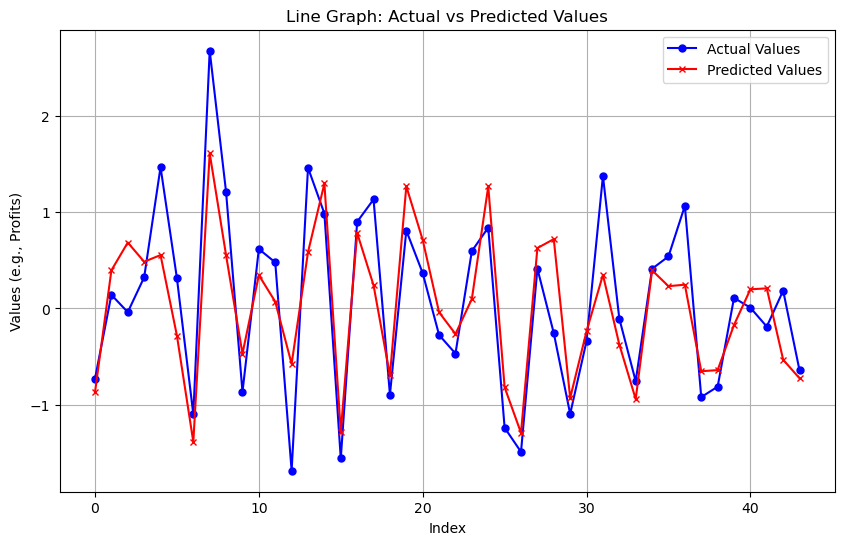

In [201]:
# Assuming X and Y are already defined
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing: Scaling numeric features and encoding categorical features
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42)

# Looping logic
best_r2 = -np.inf
best_model = None
r2_threshold = 0.90       # Stop if R2 >= this
max_attempts = 5          # Changed to 5 attempts
attempt = 0

while best_r2 < r2_threshold and attempt < max_attempts:
    attempt += 1
    print(f"\n🔁 Attempt {attempt}...")

    # Building a simple model for regression
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer with 1 unit for regression
    ])

    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

    # Train the model
    model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set
    Y_pred = model.predict(X_test).flatten()
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    print(f"Test R²: {r2:.4f}")
    print(f"Test MSE: {mse:.4f}")  # Mean Squared Error for regression

    if r2 > best_r2:
        best_r2 = r2
        best_model = model

print(f"\n Loop ended after {attempt} attempts. Best R² Score: {best_r2:.4f}")

# ---- Scatter Plot: Actual vs Predicted Values with Regression Line ----
plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values, Y_pred, label='Predicted vs Actual', color='blue', alpha=0.6)

# Add regression line
slope, intercept = np.polyfit(Y_test.values, Y_pred, 1)  # Fit a line to the scatter points
regression_line = slope * Y_test.values + intercept
plt.plot(Y_test.values, regression_line, label='Regression Line', color='red', linestyle='--')

plt.title('Scatter Plot: Actual vs Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# ---- Line Graph: Actual vs Predicted Values ----
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual Values', color='b', linestyle='-', marker='o', markersize=5)
plt.plot(Y_pred, label='Predicted Values', color='r', linestyle='-', marker='x', markersize=5)
plt.title('Line Graph: Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values (e.g., Profits)')
plt.legend()
plt.grid(True)
plt.show()